In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('terror.csv')

In [ ]:
df.head()

In [ ]:
# 결측치의 개수를 확인 
df.isna().sum()

In [ ]:
df.info()

In [ ]:
# df 데이터프레임에 있는 iyear, imonth, iday 데이터들을 모아서 시계열 데이터로 변경 

# int 데이터 타입의 스리즈를 문자 데이터 타입으로 변경 
# str(df['iyear'])  # 스리즈 데이터는 문자형으로 변환
date =  df['iyear'].astype('str') + '-' + \
df['imonth'].astype('str').replace('0', '1') + '-' + \
df['iday'].astype('str').replace('0', '1')

In [ ]:
# date 스리즈를 시계열 데이터로 변경하여 df 새로운 파생변수 생성
df['date'] = pd.to_datetime(date, format='%Y-%m-%d')

In [ ]:
df.head()

In [ ]:
## 한국의 테러 데이터를 로드 
flag = df['country_txt'] == 'South Korea'
korea_data = df.loc[flag,]

In [ ]:
korea_data.head(1)

In [ ]:
korea_data.groupby('attacktype1_txt').count()['date'].plot(kind="bar")

In [ ]:
# 대륙별 테러의 횟수를 그래프 출력
region_data = df.groupby('region_txt').count()['attacktype1_txt']

In [ ]:
region_data.sort_values(ascending=False).plot(kind='barh')

In [ ]:
# 2015년부터의 데이터만 필터링
df_2015_after = df.loc[df['iyear'] >= 2015, ]

In [ ]:
group_data = df_2015_after.groupby('region_txt').count()['attacktype1_txt']

In [ ]:
# group_data 내림차순 정렬
group_data = group_data.sort_values(ascending=False)

In [ ]:
group_data

In [ ]:
# matplot으로 그래프 시각화
x = group_data.index
y = group_data.values
# 그래프 크기 조절
plt.figure(figsize=(16, 8))
plt.bar(x, y)
plt.xticks(rotation=45)
plt.show()

In [59]:
# 남부 아시아의 데이터만 필터링 년도 1990 이후
flag = (df['region_txt'] == 'South Asia') & (df['iyear'] >= 1990)
south_asia_data = df.loc[flag, ]


In [ ]:
pd.pivot_table(
    south_asia_data, 
    index = 'iyear', 
    columns = 'country_txt', 
    values = 'attacktype1_txt', 
    aggfunc= 'count', 
    fill_value= 0
).plot(kind='barh' ,figsize=(16, 20))

In [69]:
# south_asia_data에서 몇개의 국가가 있는가?
_list = south_asia_data['country_txt'].unique()

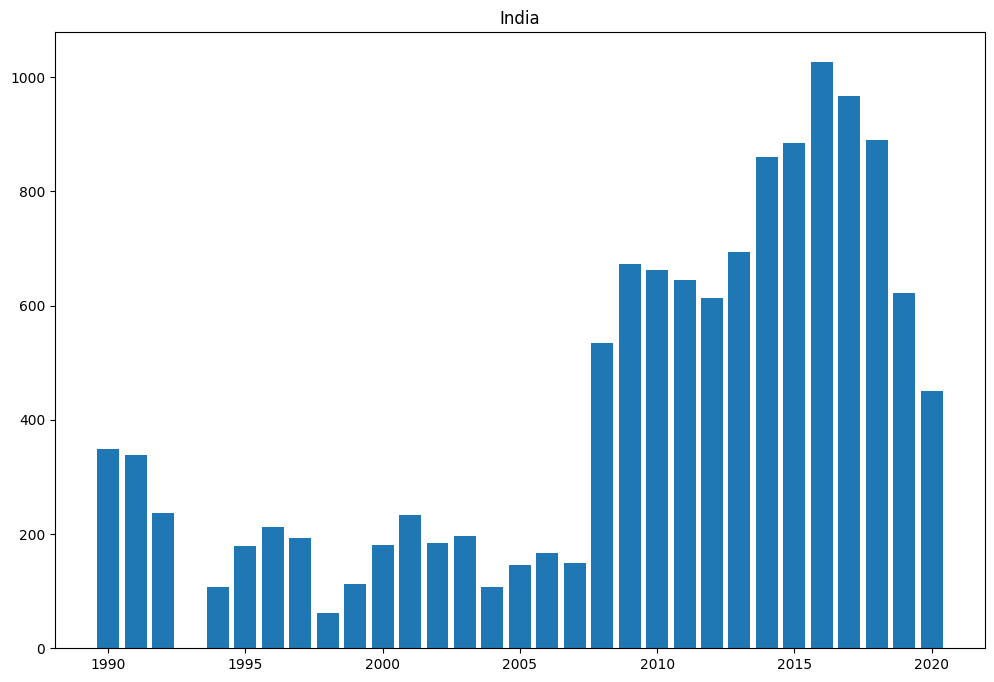

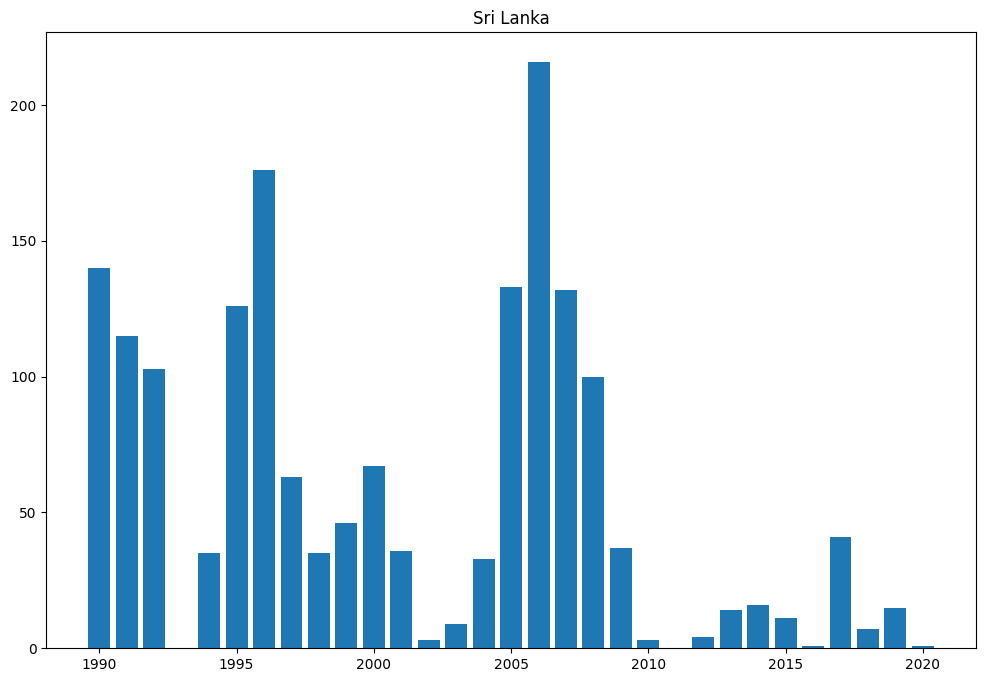

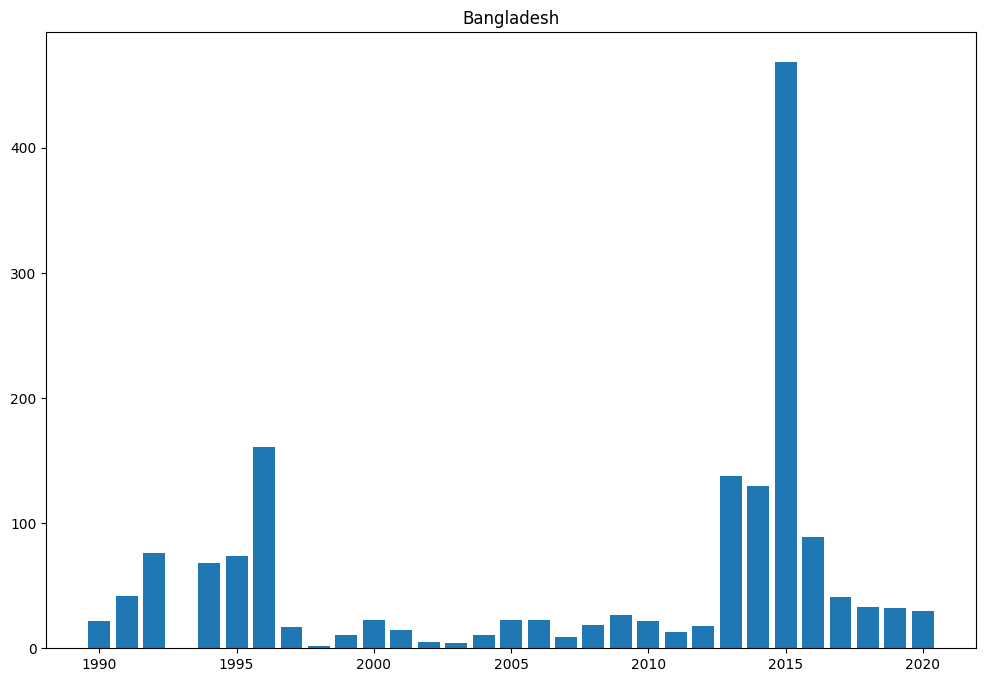

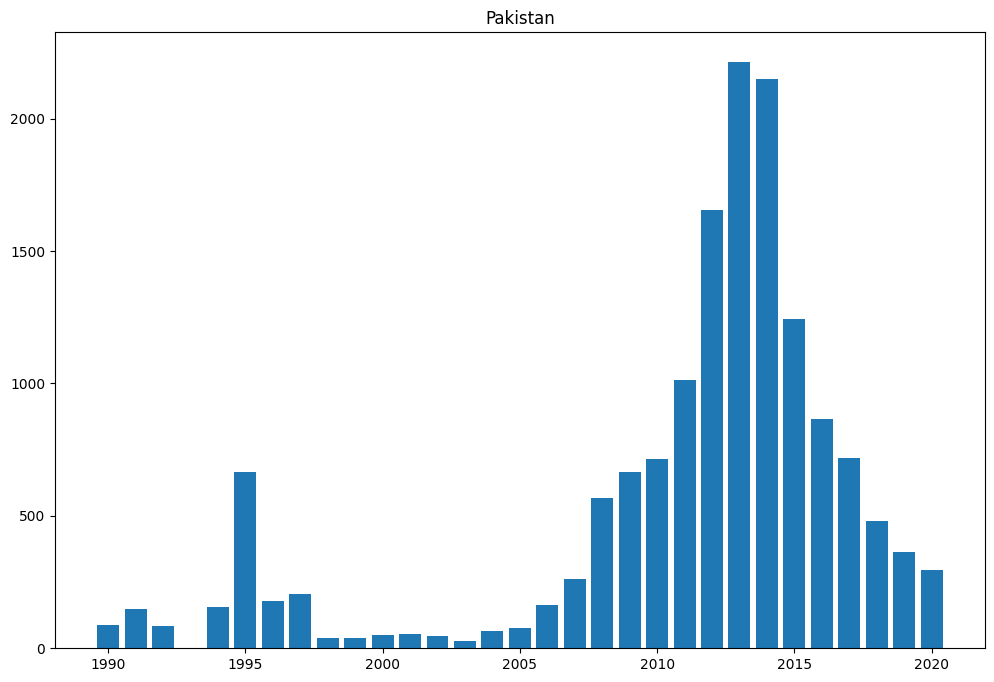

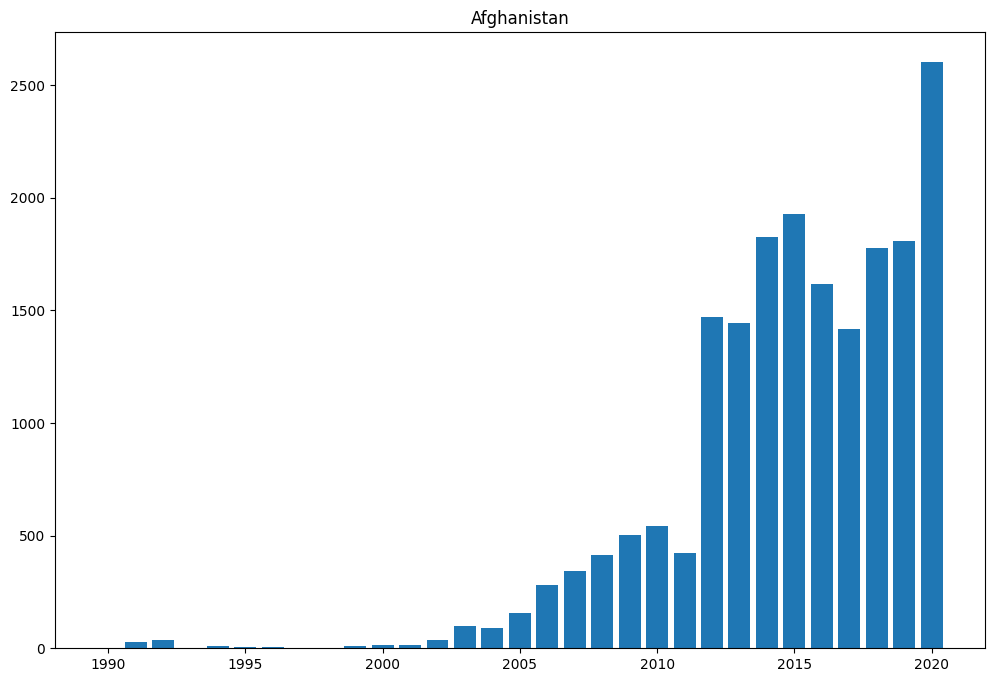

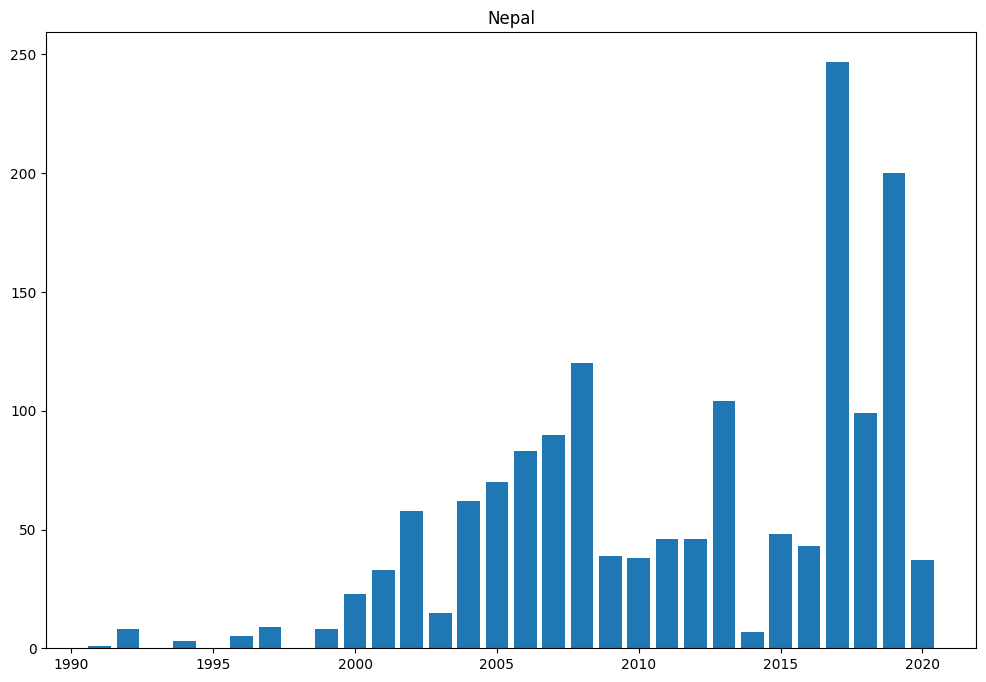

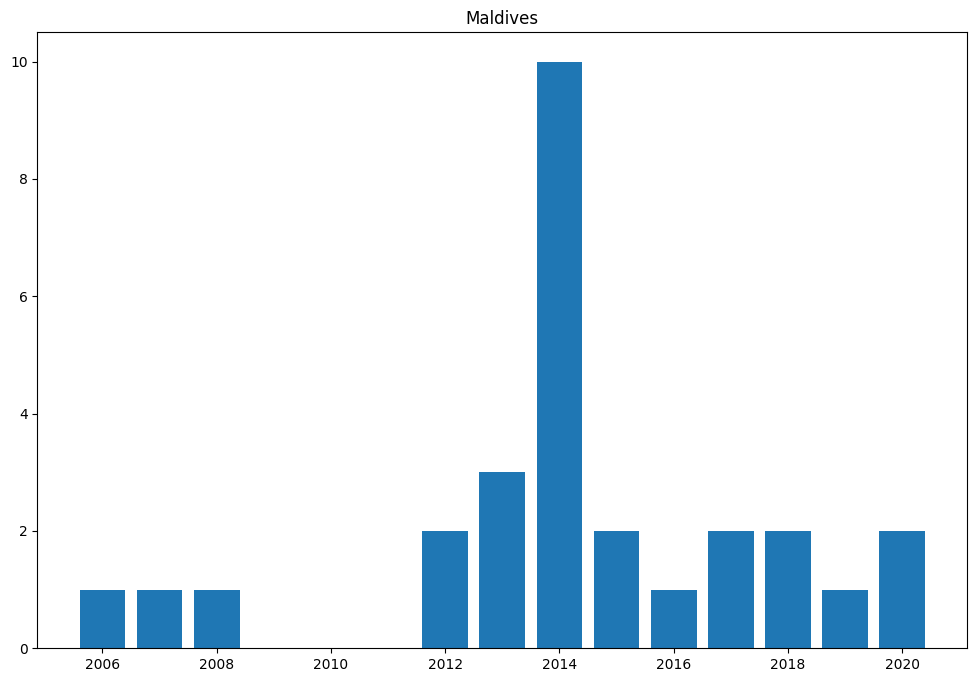

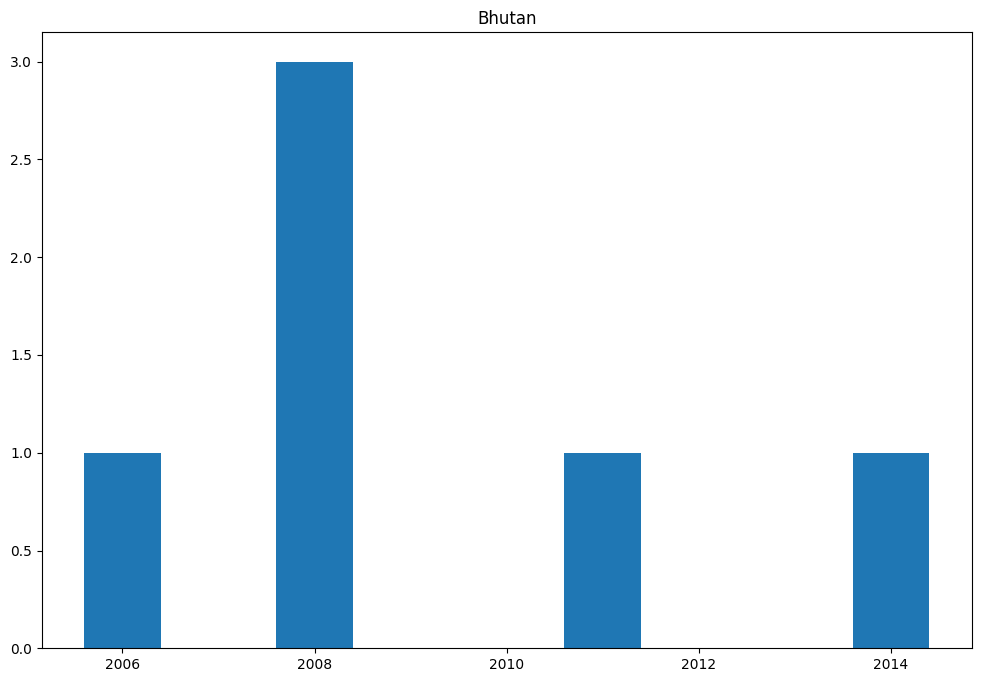

In [72]:
for country in _list:
    # country : 국가의 이름들이 하나씩 대입하여 실행
    # print(country)
    data = south_asia_data.loc[south_asia_data['country_txt'] == country, ]
    group_data = data.groupby('iyear').count()['attacktype1_txt']
    # 그래프 시각화
    x = group_data.index
    y = group_data.values
    plt.figure(figsize=(12, 8))
    plt.bar(x, y)
    plt.title(country)
    plt.show()
